# Zadanie 1 na 09/03/2021
## Wstęp
W niniejszym zadaniu zostanie wykonana wstępna, eksploracyjna analiza danych (EDA). Opracowanie dotczy zbioru forest_fires_dataset, którego dokładny opis można znaleźć w lokalizacji [https://www.apispreadsheets.com/datasets/129](https://www.apispreadsheets.com/datasets/129). Ze względu na dostępny opis i cel zadania dokonam jedynie syntezy obecnych na stronie API informacji. Zbiór zawiera 13 zmiennych i 517 obserwacji. W zbiorze nie występują braki danych. Zbiór został stworzony dla celów modelowania jaka część obszaru była objęta pożarem. Wnioski  mogą się okazać szczególnie przydatne ze względu na możliwości predykcyjne skali kataklizmu.
## Pierwszy rzut oka

In [68]:
# Wczytywanie użytecznych pakietów
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn 
from sklearn import preprocessing

In [17]:
# Wczytywanie danych z własnej lokalizacji
fires_df=pd.read_csv("C:/Users/huber/Dropbox/PW/2 SEMESTR/Wstep do uczenia maszynowego/forest_fires_dataset.csv")

In [10]:
# Rzut oka na dane dla ułatwienia wyobraźni i sprawdzenia poprawności załadowania danych
fires_df.head(n=10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86.0,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63.0,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40.0,4.0,0.0,0.0


In [11]:
# Opis typu zmiennych
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [12]:
# Podstawowe statystyki, kwantyle, liczebność, odchylenie standardowe średnia, maksimum i minimum
fires_df.describe()
# Można by jeszcze badać skośność i kurtozę

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Zmienną odpowiedzi jest ***area*** zmienna ciągła ograniczona do przedziału od 0 do 1090.84 \[ha\]. Zmienne ***X, Y*** to zmienne nominalne, skategoryzowne w skali od 1-9. Zmienne ***day, month*** to zmienne dyskretne odpowiadające częściom daty, zmienne nominalne. FFMC, DMC, DC, ISI to indexy i kody pewnych stanów meteorologicznych. Pozostałe zmienne to zmienne ciągłe. \
Możemy zauwazyć, że zmienna ***rain*** charakteryzuje się skupieniem wartości wokół jednej wielkości, to jest zera, rozkłądy tych zmiennych są mocno asymetryczne dodatnio. Podobną charakterystykę można dostrzec na podstawie informacji zawartej w wektorze odpowiedzi ***area***. Dodatkowo zmienne są nieujemne. Stąd pojawia się intuicyjna sugestia aby zabierając się do modelowania spóbować te dwie zmienne przekształcić za pomocą funkcji $ln()$. Trzeba by w tym przypadku rozważyć problem pojawiająych się zer np $ x \rightarrow ln(x+1) $. To sprawi, że przy braku pożaru nowa zmienna przyjmie wartość 0 i będzie dobrze zdefiniowana. Inna intuicja, która się pojawia to rozpatrzenie modeli tłumaczących zjawisko, które biorą pod uwagę charakterystykę inflacji zer. Takie modele to na przykład regresja poissona albo z wykorzystaniem rozkładu ujemnego dwumianowego. Można by też pokusić się o skategoryzowanie tych zmiennych. Użyć wtedy regresji logistycznej, drzew decyzyjnych, modeli wielomianowych itp. \
W przypadku pozostałych zmiennych ciągłych wartośći mediany i średniej nie różnią się zbytnio, co może oznaczać, że obserwacje nie pochodzą z rozkładów bardzo asymetrycznych.

## Wizualizacja rozkładów

<function matplotlib.pyplot.show(close=None, block=None)>

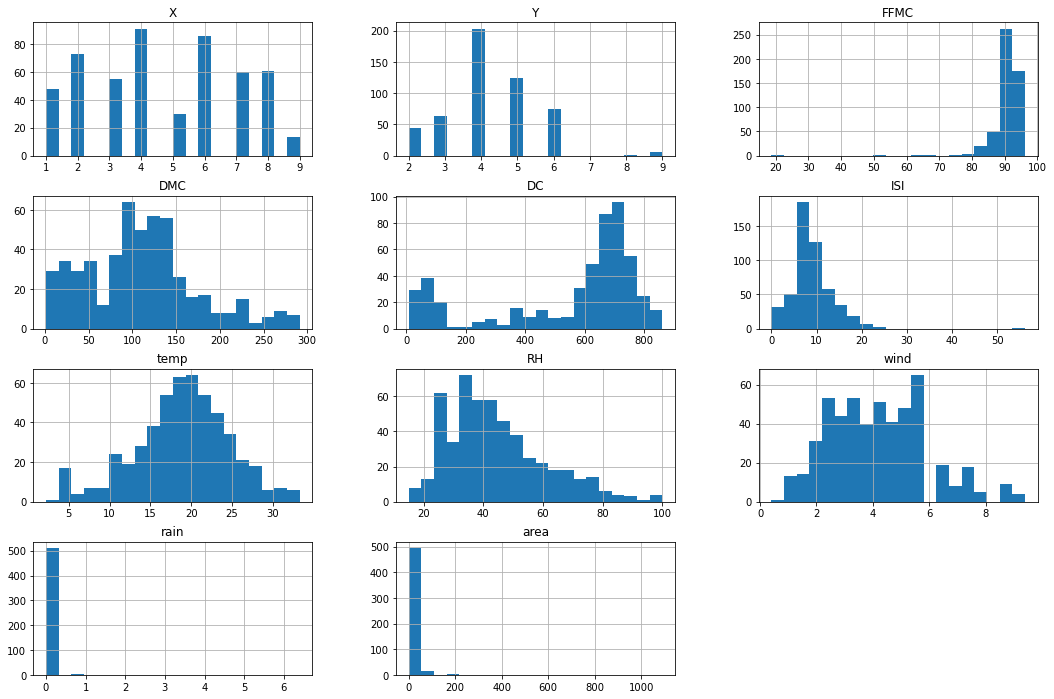

In [15]:
fires_df.hist(figsize=(18,12), bins=20)
plt.show

In [17]:
fires_df["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [18]:
fires_df["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
may      2
jan      2
nov      1
Name: month, dtype: int64

Regiony wyznaczane przez koordynaty X i Y nie są równomiernie reprezentowane, tak samo miesiące. Może wszystkie obserwacje dotyczą pożarów? Doczytałem i okazuje się, że wszystkie obserwacje pochodzą z pożarów, natomiast jako zera są kodowane takie przypakdi gdy obszar objęty pożarem jest mniejszy niż 100m^2. Dni tygodnia raczej nie mogą być zbyt informatywne, chociaż może w przypadku pożarów powodowanych przez ludzi, ich działalność charakterystyczna dla danego dnia (weekend, tydzień, itp.) może mieć wpływ.

In [18]:
# Indykatorowa zmienna pokazująca znaczące pożary, to jest takie, które przekraczają swoim obsarem 100m^2
fires_df["IsFire"]=0
fires_df.loc[list(np.where(fires_df["area"]>0)[0]),"IsFire"]=1 

<AxesSubplot:xlabel='X', ylabel='Y'>

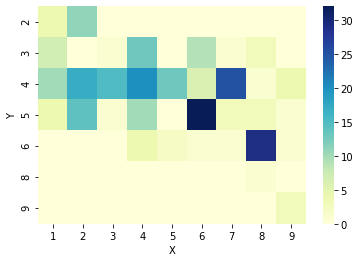

In [141]:
# Heatmapa występowania pożarów w przestrzeni
HitMap=fires_df.loc[ list(np.where(fires_df.IsFire==1)[0]) , ["X","Y", "IsFire"] ]
HitMap=pd.DataFrame(HitMap.groupby(["Y", "X"], as_index=False).size())
HitMap=HitMap.pivot("Y","X","size").fillna(0)
sns.heatmap(HitMap,cmap="YlGnBu")

<AxesSubplot:xlabel='X', ylabel='Y'>

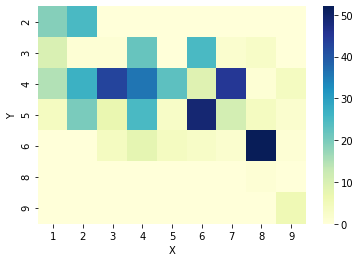

In [144]:
# Heatmapa ze wszystkimi obserwacjami, czyli ze wszystkimi pożarami
HitMapa=pd.DataFrame(fires_df.groupby(["Y", "X"], as_index=False).size())
HitMapa=HitMapa.pivot("Y","X","size").fillna(0)
sns.heatmap(HitMapa,cmap="YlGnBu")

Jest pewne podejrzenie, że obszar parku nie pokrywa całości mapy. Możliwe, że nie jest on w kształcie prostokąta. 

C:\Users\huber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

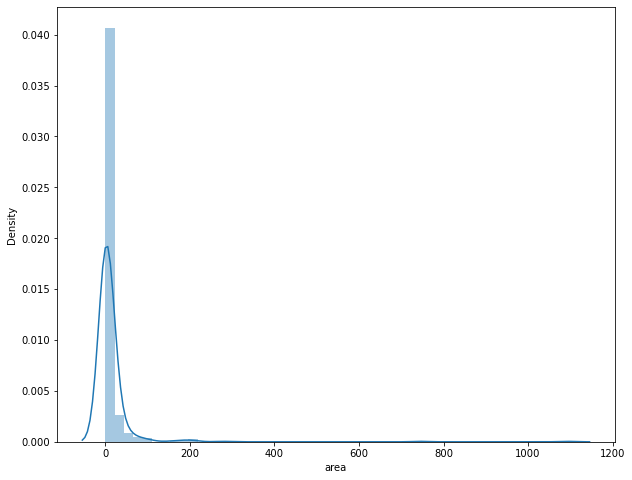

In [52]:
sns.distplot(fires_df['area'])

C:\Users\huber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

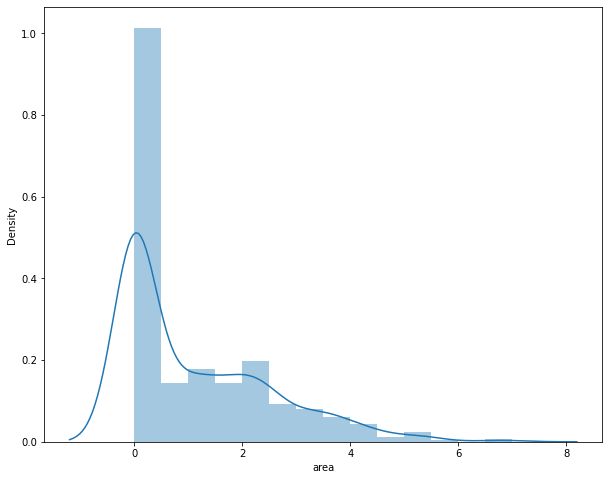

In [51]:
#fig, (ax1, ax2) = plt.subplots(2,1)
#fig.suptitle("Zmienna area i jej logarytmiczne przekształcenie")
# Wydaje się że wygląda lepiej
sns.distplot(np.log(fires_df['area']+1))#)

In [19]:
fires_df['ln_area']=np.log(fires_df['area']+1)
fires_df['ln_rain']=np.log(fires_df['rain']+1)

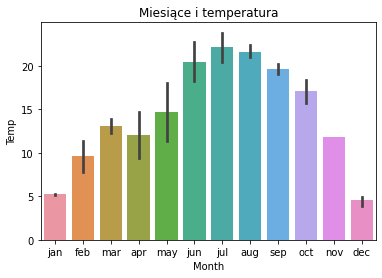

In [133]:
month_temp = sns.barplot(x = 'month', y = 'temp', data =fires_df,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']);
month_temp.set(title = "Miesiące i temperatura", xlabel = "month", ylabel = "temp");

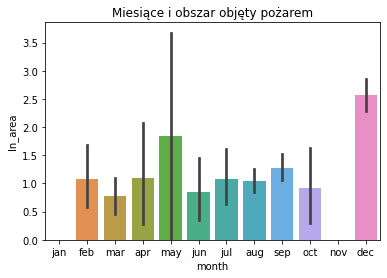

In [135]:
month_temp = sns.barplot(x = 'month', y = 'ln_area', data =fires_df,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']);
month_temp.set(title = "Miesiące i logarytm obszaru objętego pożarem", xlabel = "month", ylabel = "ln_area");

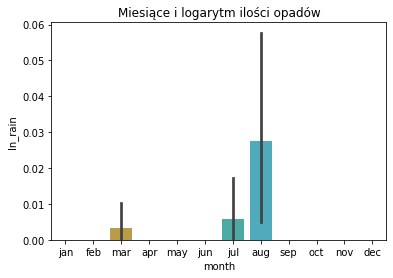

In [136]:
month_temp = sns.barplot(x = 'month', y = 'ln_rain', data =fires_df,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']);
month_temp.set(title = "Miesiące i logarytm ilości opadów", xlabel = "month", ylabel = "ln_rain");

In [137]:
fires_df.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

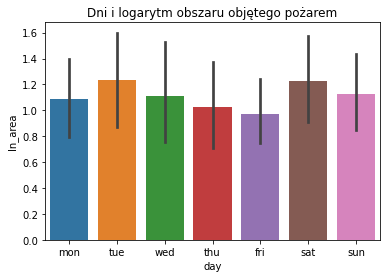

In [140]:
day_temp = sns.barplot(x = 'day', y = 'ln_area', data =fires_df,
                         order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']);
day_temp.set(title = "Dni i logarytm obszaru objętego pożarem", xlabel = "day", ylabel = "ln_area");

C:\Users\huber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Zliczenia występowań instancji w podziale na dni tygodnia'),
 Text(0.5, 0, 'Days'),
 Text(0, 0.5, 'Count')]

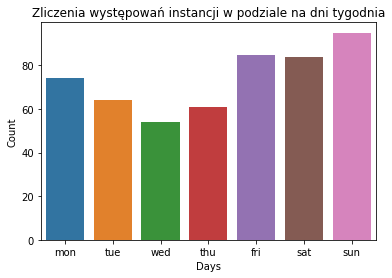

In [21]:
days = sns.countplot(fires_df['day'], order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
days.set(title = 'Zliczenia występowań instancji w podziale na dni tygodnia', xlabel = 'Days', ylabel = 'Count')

C:\Users\huber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Zliczenia występowań instancji w podziale na miesiące'),
 Text(0.5, 0, 'Days'),
 Text(0, 0.5, 'Count')]

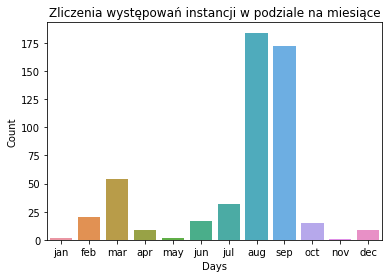

In [23]:
days = sns.countplot(fires_df['month'], order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
days.set(title = 'Zliczenia występowań instancji w podziale na miesiące', xlabel = 'Days', ylabel = 'Count')

Powyższe wykresy w pewnym sensie są rozumiane same przez się. Nie ma aż takich różnic pomiędyz dniami tygodnia, może działalność weekendowa wpływa na wyższą liczbę obserwacji pożarów w wokół tych dni. Najwięcej pożarów, nacząco więcej występuje latem. Natomiast przeciętnie nie są one aż tak obszerne jak w miesiącach takich jak maj czy zasakująco grudzień. Możliwe, że ten pożar z grudnia to błędnie wprowadzona instancja. 

<AxesSubplot:>

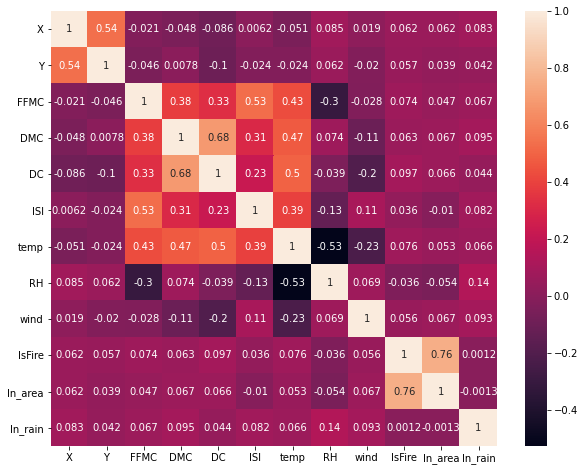

In [35]:
# Korelogram z korelacja pearsona
plt.rcParams['figure.figsize'] = [10, 8]
sns.heatmap(fires_df.loc[:,['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'IsFire', 'ln_area',  'ln_rain']].corr(method="pearson"), annot = True)

<AxesSubplot:>

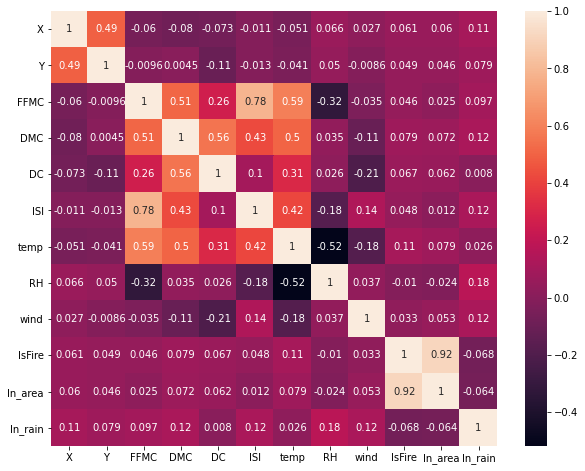

In [36]:
# Korelogram z korelacja spearmana
plt.rcParams['figure.figsize'] = [10, 8]
sns.heatmap(fires_df.loc[:,['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'IsFire', 'ln_area',  'ln_rain']].corr(method="spearman"), annot = True)

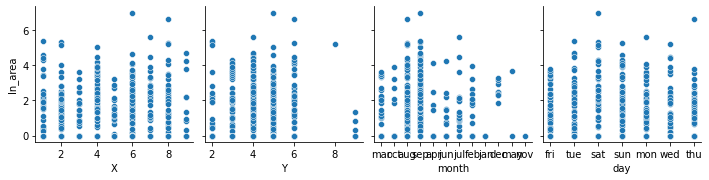

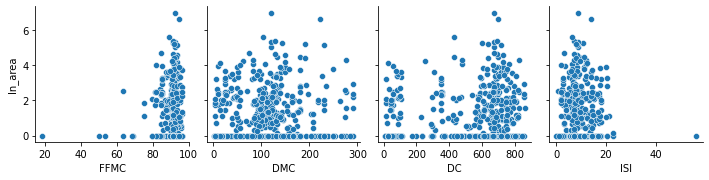

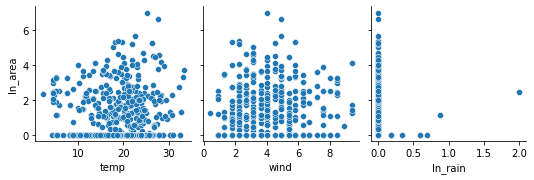

In [49]:
sns.pairplot(fires_df, y_vars="ln_area", x_vars=fires_df.columns.values[:4])
sns.pairplot(fires_df, y_vars="ln_area", x_vars=fires_df.columns.values[4:8])
sns.pairplot(fires_df, y_vars="ln_area", x_vars=fires_df.columns.values[list([8,10,15])])
plt.show()

Korelacja pearsona mierzy współwystępowanie, zależność liniowa pomiedzy zmiennymi, korelacja speramana jest bardziej wrażliwa na zależności nieliniowe. Obserwacje wpływowe i odstające najłatwiej byłoby ocenić na podstawie reszt z dopasowanego modelu. Można by było w tym momencie znormalizować zmienne odejmując średnią i dzieląc przez odchylenie standardowe i wyszukać takich obserwacji, które różnią się np. o trzy sigmy od wartości średniej czyli mają wartość wyższą niż 3. Wydaje się, że zmienne nie pochodzą z rozkładów gruboogonowych, więc taka heurystyka miałaby swoje zastosowanie.
## Automatyczne EDA z pandas - profiling

In [85]:
#import sys
#!{sys.executable} -m pip install -U pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

phik 0.11.2 requires scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=05e79411909d2f587b2527e1145e36fd9c79502465058e740ef36220e32ca555
  Stored in directory: c:\users\huber\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107420 sha256=835ac561765cf4e0c0b3fd03666d9a256e0ba2bb7c8800f24053e507238534a1
  Stored in directory: c:\users\huber\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
Successfully built htmlmin phik


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [88]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(fires_df, title='Pandas Profiling Report', explorative=True)
#profile.to_file("raport_automatyczne_EDA.html")

Komentarz do automatycznego EDA: nie wszystko złoto co się świeci. Automatyczne EDA jest całkiem szybką opcją, może dostarczyć wstępnych podstawowych informacji - spostrzeżeń na temat zależności pomiędzy zmiennymi. Nie wyczerpuje nastomiast wszystkich możliwych analiz, które można dokonać w ramach EDA, przykładem powyższa prosta analiza mojego autorstwa.